#***Clustering Analysis***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
data = pd.read_excel('/content/sample_data/EastWestAirlines.xlsx', sheet_name='data')

In [3]:
# Preprocessing the dataset
# Handle missing values
data.fillna(method='ffill', inplace=True)

# Remove outliers using Z-score method
z_scores = np.abs((data - data.mean()) / data.std())
data = data[(z_scores < 3).all(axis=1)]

# Scale the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

<ipython-input-3-e4e3df352cac>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


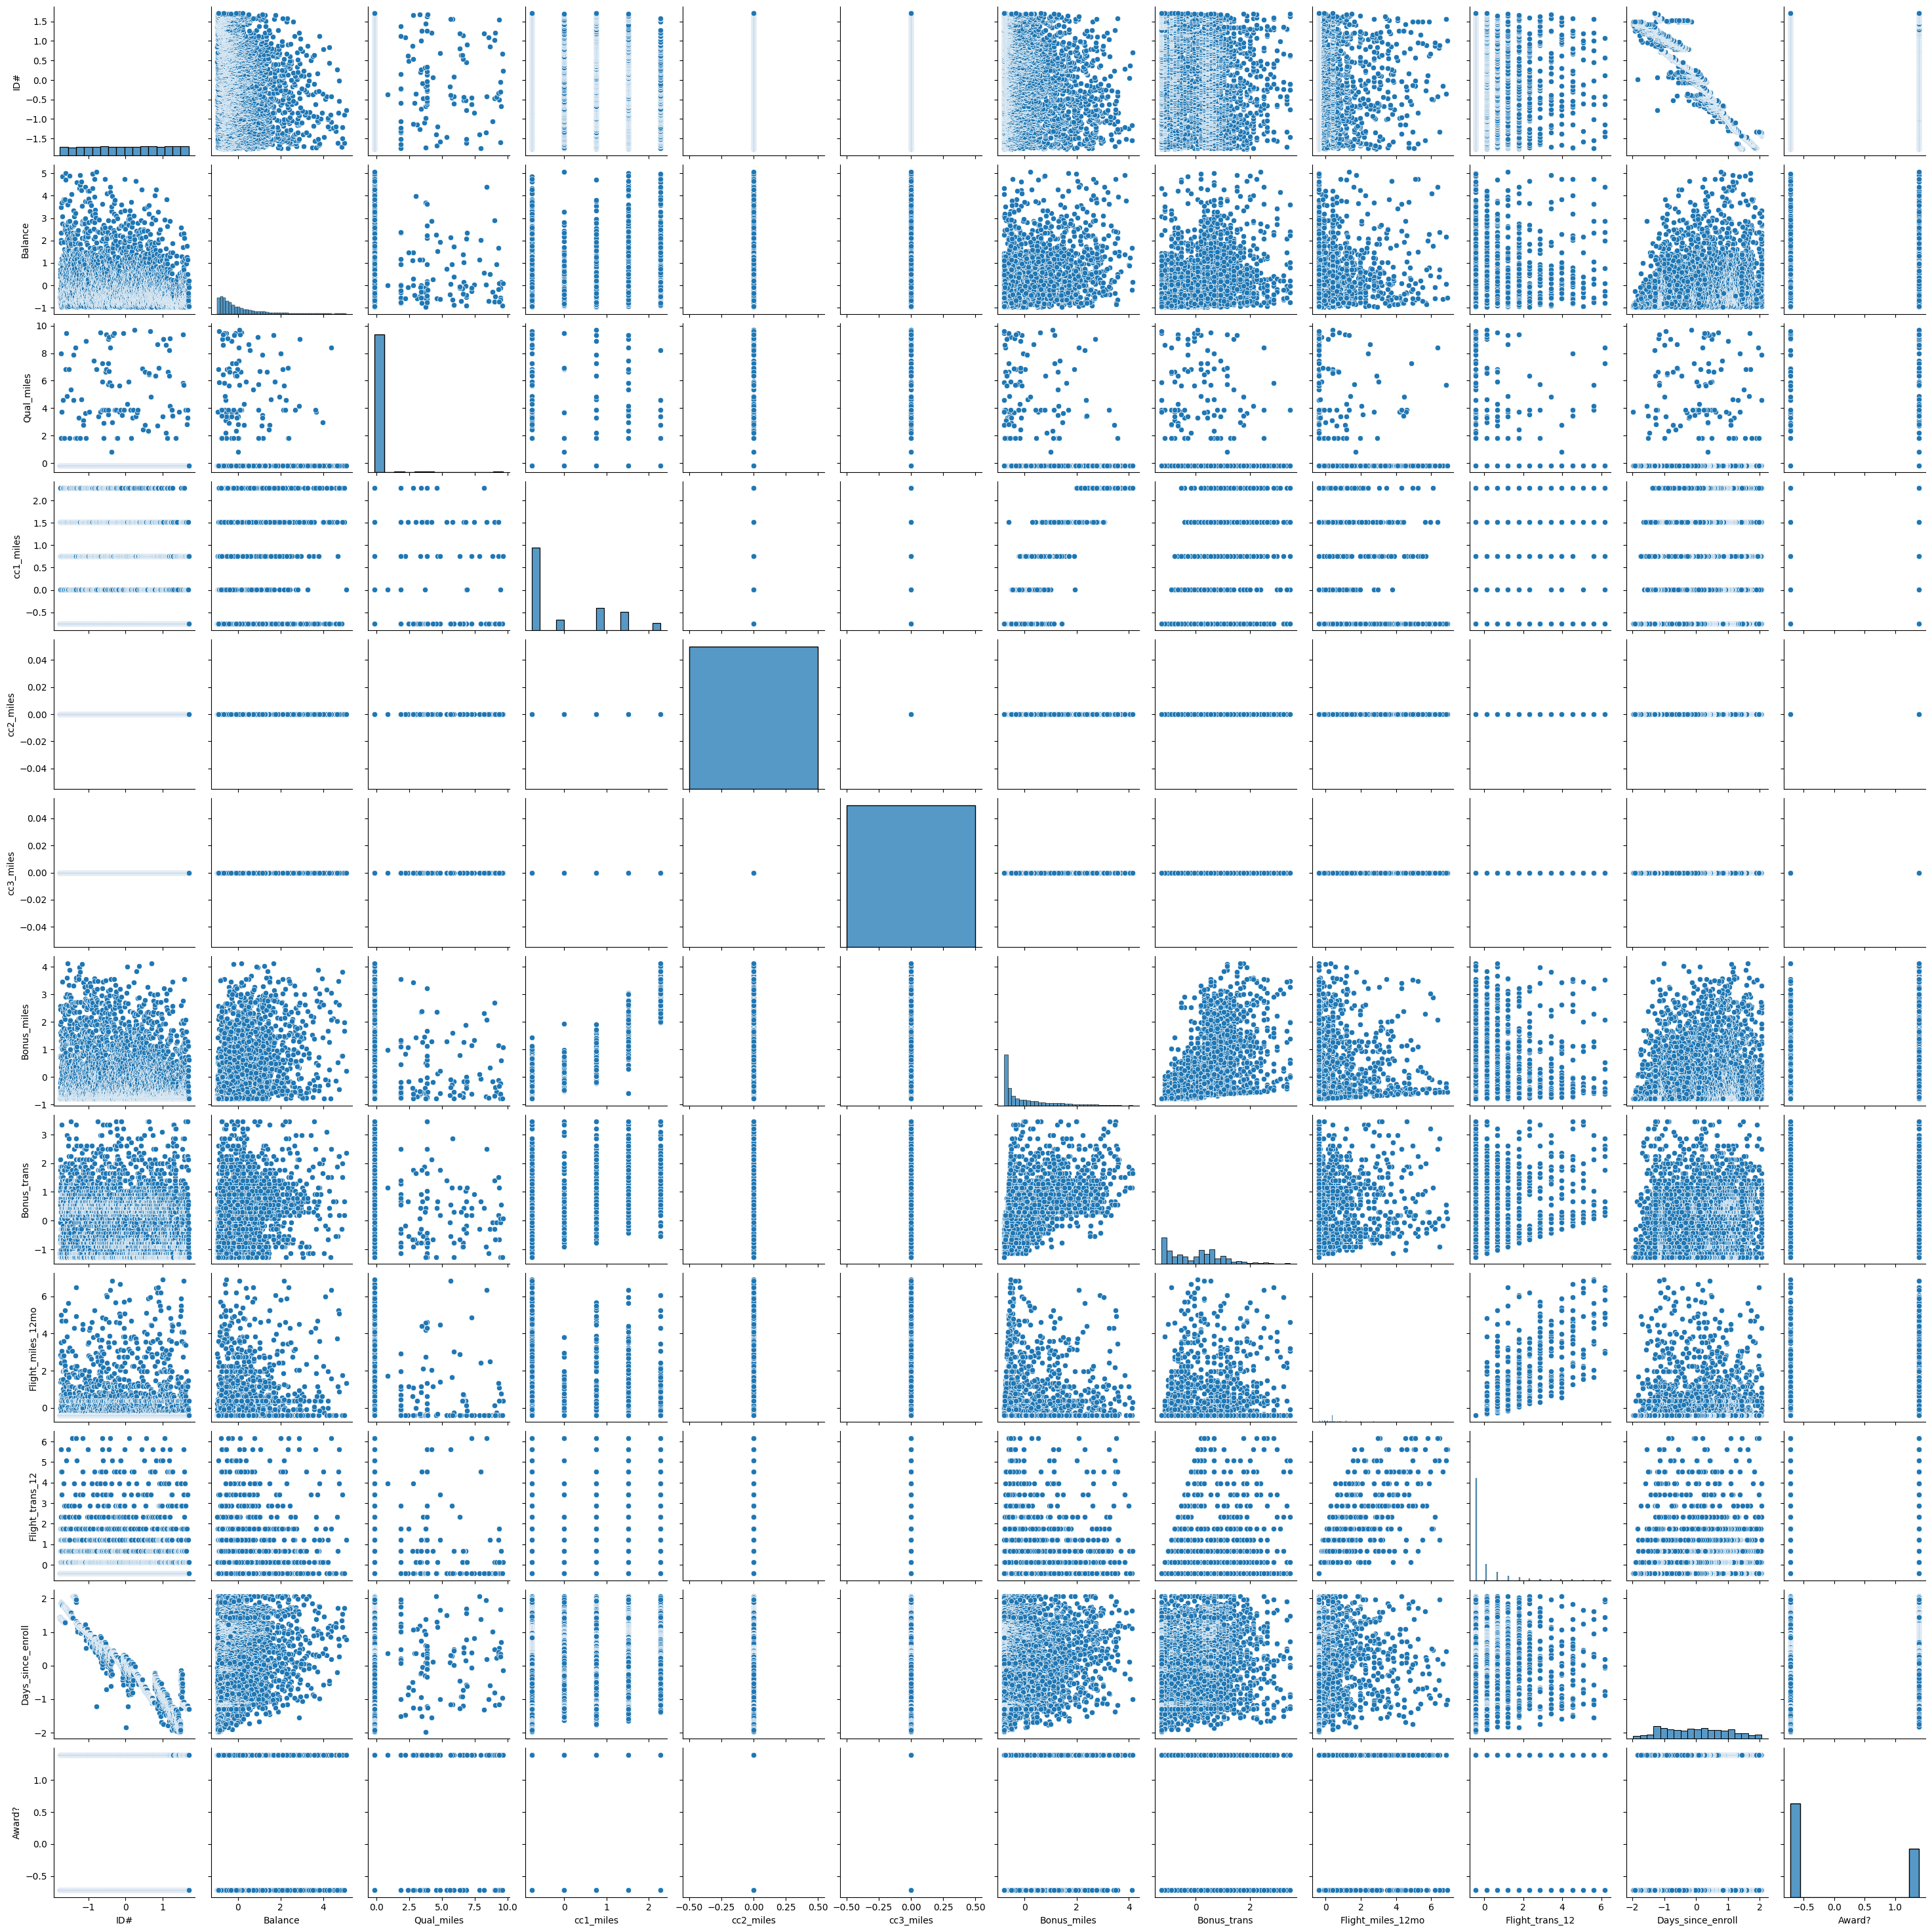

In [4]:
#Exploratory Data Analysis
sns.pairplot(pd.DataFrame(data_scaled, columns=data.columns))
plt.show()

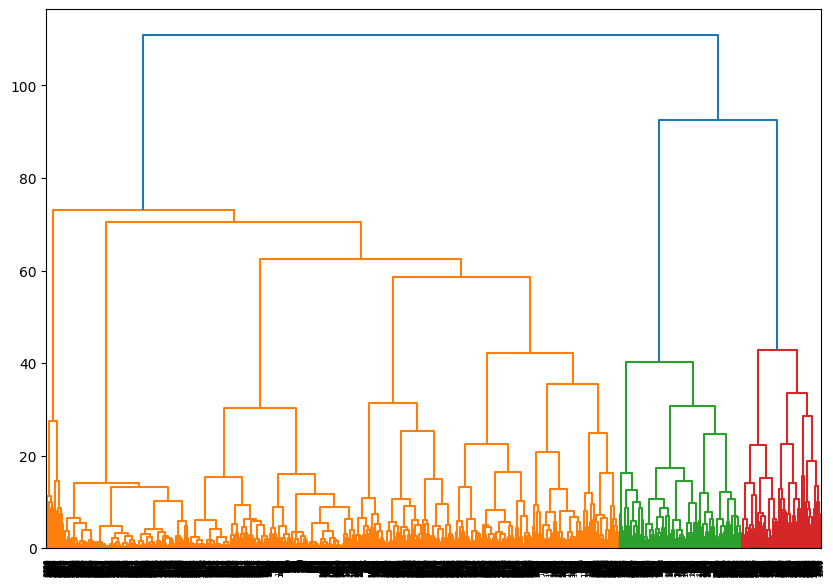

In [5]:
# Implementing Clustering Algorithms
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
data['KMeans_Cluster'] = kmeans_labels

# Hierarchical Clustering
linked = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.show()

# Assign clusters using a cutoff distance
hierarchical_labels = fcluster(linked, t=3, criterion='maxclust')
data['Hierarchical_Cluster'] = hierarchical_labels

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)
data['DBSCAN_Cluster'] = dbscan_labels

In [6]:
# Cluster Analysis and Interpretation
print("K-Means Clustering\n", data.groupby('KMeans_Cluster').mean())
print("\nHierarchical Clustering\n", data.groupby('Hierarchical_Cluster').mean())
print("\nDBSCAN Clustering\n", data.groupby('DBSCAN_Cluster').mean())

K-Means Clustering
                         ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                 
0               1626.464431  107520.339431   56.776423   3.741870        1.0   
1               3140.555243   36530.693878   23.677692   1.344124        1.0   
2               1104.853997   50857.415987   44.190865   1.353997        1.0   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                     1.0  37937.549797    18.614837         474.564024   
1                     1.0   5551.126671     7.291344         156.718508   
2                     1.0   5469.435563     7.615824         196.065253   

                Flight_trans_12  Days_since_enroll    Award?  \
KMeans_Cluster                                                 
0                      1.418699        4807.829268  0.652439   
1          

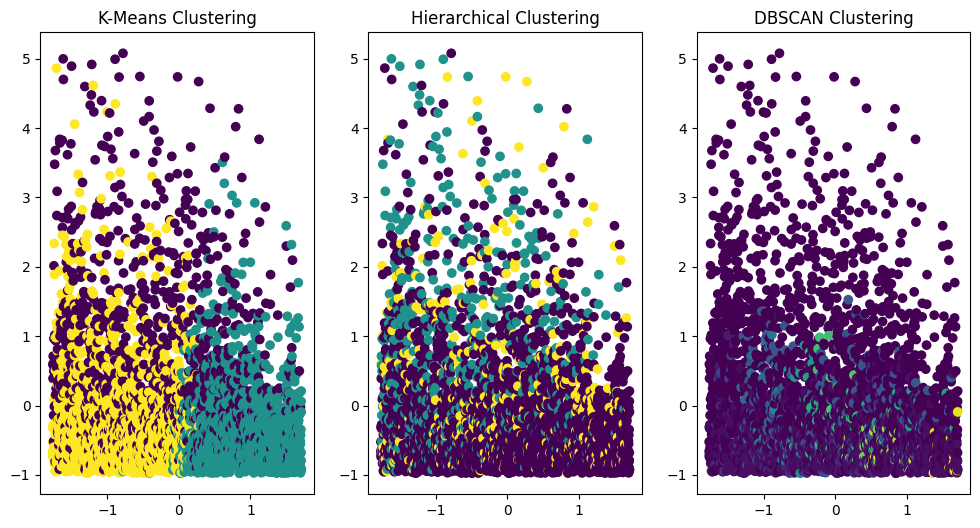

In [7]:
# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')

plt.subplot(1, 3, 2)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering')

plt.subplot(1, 3, 3)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')

plt.show()

In [8]:
# Evaluation and Performance Metrics
print("Silhouette Score for K-Means: ", silhouette_score(data_scaled, kmeans_labels))
print("Silhouette Score for Hierarchical: ", silhouette_score(data_scaled, hierarchical_labels))
print("Silhouette Score for DBSCAN: ", silhouette_score(data_scaled, dbscan_labels))

Silhouette Score for K-Means:  0.21593106797375733
Silhouette Score for Hierarchical:  0.2735264665074105
Silhouette Score for DBSCAN:  -0.3994808098553046
